In [1]:
import sys
sys.path.append('/dls_sw/apps/scisoftpy/2.7')
sys.path.append('/dls_sw/i16/software/python')
from dlstools.dataloader import *
from dlstools import *
from matplotlib.pyplot import *
from dlstools.quickfit import *
from dlstools.dirty_fit import fit
%matplotlib nbagg 
p='/dls/i16/data/2018/mt19842-1/%i.nxs'
me='/dls/science/users/spc93/'

=== Importing dlstools package


/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/dls_sw/apps/scisoftpy/2.7/scisoftpy/_external/tifffile.py:284: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
Could not import plotting routines
No module named py4j.java_gateway


=== Need to obtain specfilewrapper.py and compatible specfile.so from ERSF PyMCA package in order to load spec files


/dls_sw/i16/software/python/dlstools/dataloader.py:44: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  setattr(self,'nx',_nx)
/dls_sw/apps/python/anaconda/1.7.0/64/envs/cctbx/lib/python2.7/site-packages/matplotlib/pyplot.py:3259: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


/dls/i16/data/2018/mt19842-1/715096.nxs
scan eta 21.68203086440007 21.74203086440007 0.002 pil3_100ks 1 roi2
Function name: Pseudo-Voigt + const
      area:             5071 +/- 108       
    centre:        21.710911 +/- 0.000030  
     width:          0.01315 +/- 0.00010   
     lfrac:             0.51 +/- 0.04      
  constant:            -1647 +/- 1271      



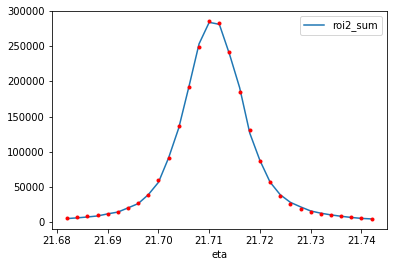

In [2]:
#FeS2 022 8.7 keV
n=pdnx(p % 715096)
print n.scan
n.plot(x='eta', y='roi2_sum')
fit(pv_c)

Text(0,0.5,u'ic1')

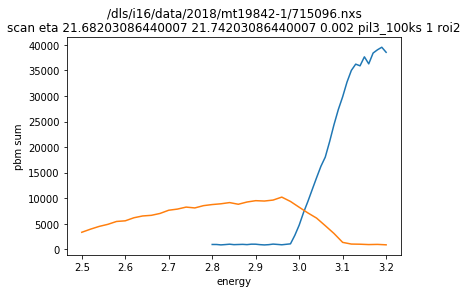

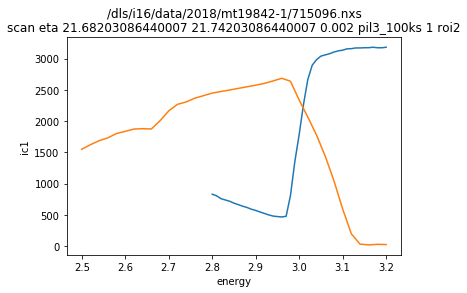

In [3]:
n1=pdnx(p % 715125)
n2=pdnx(p % 715126)
figure()
plot(n1.DCMenergy, n1['sum'])
plot(n2.DCMenergy, n2['sum']); title(n.scan); xlabel('energy'); ylabel('pbm sum')

figure()
plot(n1.DCMenergy, n1.ic1monitor)
plot(n2.DCMenergy, n2.ic1monitor); title(n.scan); xlabel('energy'); ylabel('ic1')




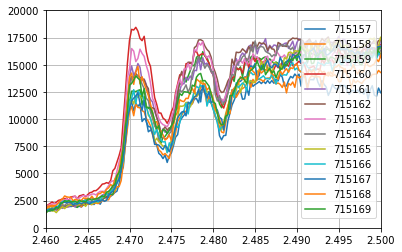

In [4]:
figure()
for scan in range(715157, 715169+1):
    n=pdnx(p % scan)
    plot(n.DCMenergy, n['sum'], label=str(scan))
legend(loc='right'); grid(1)
xlim([2.46, 2.5]); ylim([0,20000])
savefig(me+'images/fes2_fluo_monday.pdf')

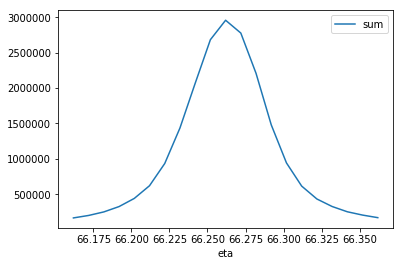

In [5]:
#002 2.5 keV atten 1
n=pdnx(p % 715184); n.scan

n.plot(x='eta', y='sum')

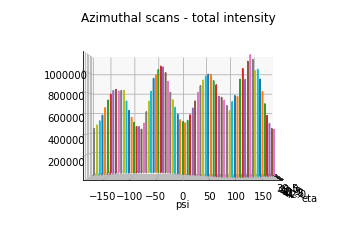

In [6]:
#011 first azimuthal scans pilatus
figure()
for scan in range(715203, 715275+1):
#for scan in range(715203, 715204):
    n=pdnx(p % scan)
    psi = n.psi[0]*(n.eta*0+1) # fix for occasional bad psi values
    gca(projection='3d').plot(np.array(n.eta), psi, np.array(n['sum']))
title('Azimuthal scans - total intensity'); xlabel('eta'); ylabel('psi')
ylim([-180,180])
ax1=gca()
ax1.view_init(0,0)


In [7]:
savefig(me+'images/tmp.pdf') 

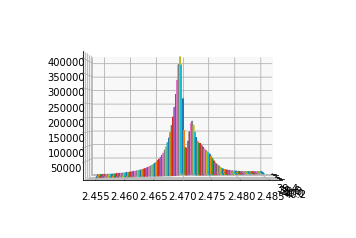

In [8]:
#011 eta vs energy pilatus
figure()
sum011, en011 = [], []
for scan in range(715338, 715458+1):
#for scan in range(715338, 715458+1, 120):
    n=pdnx(p % scan)
    energy=np.array(n.nx.entry1.sample.beam.incident_energy + n.eta*0)
    gca(projection='3d').plot(np.array(n.eta), energy, np.array(n.roi2_sum))
    #gca(projection='3d').plot(np.array(n.eta), energy, np.array(n.roi2_sum)/max(n.roi2_sum)) #normalized
    sum011+=[sum(np.array(n.roi2_sum))]
    en011+=[float(n.nx.entry1.sample.beam.incident_energy)]
#ylim([-180,180])
ax=gca()
ax.view_init(0,0)




<IPython.core.display.Javascript object>


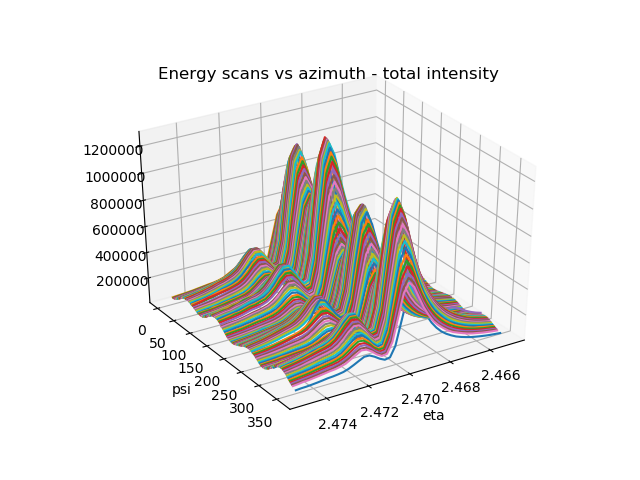

In [34]:
#011 energy vs psi
figure()
for scan in range(715464+1, 715819, 2):
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0) % 360 #modulo 360
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n['sum']))
title('Energy scans vs azimuth - total intensity'); xlabel('eta'); ylabel('psi')
#ylim([-180,180])
ax=gca()
ax.view_init(40,90)
savefig(me+'images/energy_vs_psi.pdf')   


In [35]:
savefig(me+'images/energy_vs_psi.pdf')  

Text(0.5,0,u'psi')

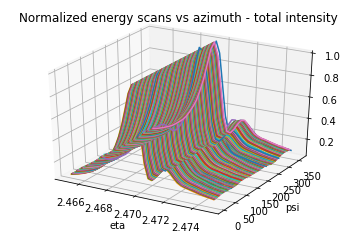

In [10]:
#011 energy vs psi (normalized)
figure()
for scan in range(715464+1, 715819, 2):
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0)  % 360
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n['sum'])/max(np.array(n['sum'])))
title('Normalized energy scans vs azimuth - total intensity'); xlabel('eta'); ylabel('psi')
#ylim([-180,180])
#ax=gca()
#ax.view_init(40,90)


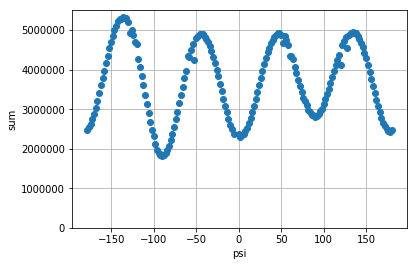

In [11]:
#011 energy vs psi - eta alignment peaks
figure()
psival, sumcts = [], []
for scan in range(715464, 715819, 2):
    n=pdnx(p % scan)
    #print scan
    #psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.eta*0)
    psival+=[float(n.nx.entry1.before_scan.diffractometer_sample.psi)]
    sumcts+=[sum(n['sum'])]
    #gca(projection='3d').plot(np.array(n.eta), psi, np.array(n['sum']))
figure()
plot(psival, sumcts,'o')
xlabel('psi'); ylabel('sum'); ylim([0,5500000]); grid(1)


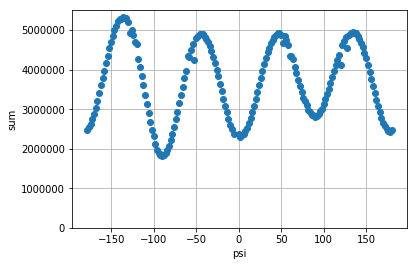

In [12]:
figure()
plot(psival, sumcts,'o')
xlabel('psi'); ylabel('sum'); ylim([0,5500000]); grid(1)

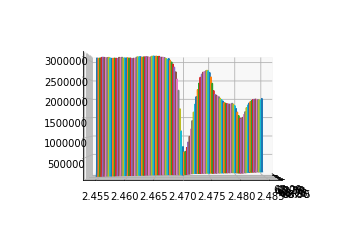

In [13]:
#002 eta vs energy pilatus
sum002, en002 = [], []
figure()
for scan in range(715835, 715955+1):
    n=pdnx(p % scan)
    energy=np.array(n.nx.entry1.sample.beam.incident_energy + n.eta*0)
    gca(projection='3d').plot(np.array(n.eta), energy, np.array(n['sum']))
    sum002+=[sum(np.array(n['sum']))]
    en002+=[float(n.nx.entry1.sample.beam.incident_energy)]
#ylim([-180,180])
ax=gca()
ax.view_init(0,0)


#002
#715459-715463

#011
#715464-

Text(0.5,1,u'011 & 002 peak areas')

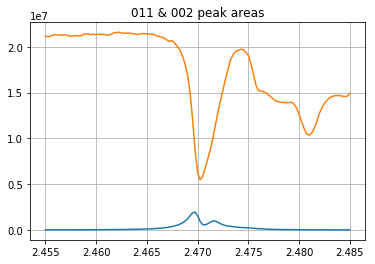

In [14]:
figure()
plot(en011,np.array(sum011))
plot(en002,np.array(sum002))
grid(1)
title('011 & 002 peak areas')
#len(np.array(sum011))
#len(en)
#len(range(715834, 715937))


Function name: cosine + const
       amp:           369756 +/- 8444      
    period:            193.5 +/- 1.7       
     phase:             36.3 +/- 0.7       
  constant:           330885 +/- 5685      



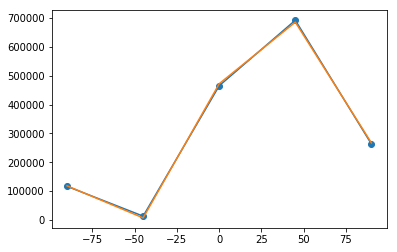

In [ ]:
polrot, thpsum = [], []
for scan in range(715981, 715985+1):
    n=pdnx(p % scan)
    polrot+=[float(n.nx.entry1.before_scan.pa.stokes)]
    thpsum+=[sum(n.APD)]
#polrot+=[polrot[0]]
#thpsum+=[thpsum[0]]

#figure(); gca(projection='polar').plot(np.array(polrot)*np.pi/180, thpsum, 'o-')
figure(); plot(polrot, thpsum, 'o-')
cos_c.fit(polrot, thpsum, pin=[350000, 180, 0, 350000])
plot(polrot, cos_c(polrot))
print cos_c

In [ ]:
#011 PA intesnsies vs psi energy e1
psi=[]
isum={}
polvals=[90, 45, 0, -45, -90]
for polval in polvals:
    isum[polval] = []
    
for scan in range(716019, 717320, 18):
    for irot in range(5):
        n=pdnx(p % (scan+irot))
        if irot==0:
            psi+=[n.psic[0]]
            energy=n.en
        stokes=int(np.round(n.stokes[0]))
        isum[stokes]+=[sum(n.APD)]

figure()
for polval in polvals:
    plot(psi, isum[polval],'o-',label=str(polval))
xlabel('psi'); grid(1); legend()
savefig(me+'images/psi_pol_e1.pdf')   

#011 PA intesnsies vs psi energy e2
psi=[]
isum={}
polvals=[90, 45, 0, -45, -90]
for polval in polvals:
    isum[polval] = []
    
for scan in range(716028, 717320, 18):
    for irot in range(5):
        n=pdnx(p % (scan+irot))
        if irot==0:
            psi+=[n.psic[0]]
            energy=n.en
        stokes=int(np.round(n.stokes[0]))
        isum[stokes]+=[sum(n.APD)]

figure()
for polval in polvals:
    plot(psi, isum[polval],'o-',label=str(polval))
xlabel('psi'); grid(1); legend()
savefig(me+'images/psi_pol_e2.pdf')   


In [ ]:
#energy scans s-p (pol 90) for psi values near zero
figure()
for scan in [717354, 717356, 717358, 717362, 717364, 717366, 717368, 717370]:
    n = pdnx(p % scan);
    plot(n.DCMenergy, n.APD, label= str(scan)+' $\psi$: '+str(n.nx.entry1.before_scan.diffractometer_sample.psi))
    
legend(); grid(); xlabel('Energy (eV)')   
savefig(me+'images/weak_psi_energy_scans.pdf')    


In [ ]:
#energy scans s-p (pol 90) for psi values near zero
figure()
for scan in range(717372,717380+1,2):
    n = pdnx(p % scan);
    plot(n.DCMenergy, n.APD/max(n.APD), label= str(scan)+' $\psi$: '+str(n.nx.entry1.before_scan.diffractometer_sample.psi))
    
legend(); grid(); xlabel('Energy (eV)')
title('Normalized energy scans')
savefig(me+'images/weak_psi_energy_scans.pdf') 

In [ ]:
#night05oct2018a.py
#011 energy scans ss and sp
figure()
#for scan in range(717392, ):
for scan in [717392]:
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0)
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n.APD))
xlabel('Energy (keV)'); ylabel('psi (deg)'); title('pol=90')

figure()
for scan in [717393]:
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0)
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n.APD))    
xlabel('Energy (keV)'); ylabel('psi (deg)'); title('pol=90')


In [ ]:
for scan in range(717400,717674,8):
    n=pdnx(p % scan)
    
    

In [ ]:
n=pdnx(p % 717400)
print(n.nx.entry1.before_scan.diffractometer_sample.psi)


In [ ]:
figure()
for scan in range(717400,717978,8):
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0) 
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n['APD']))
title('Pol 90')


In [ ]:
figure()
for scan in range(717402,717978,8):
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0)
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n['APD']))
title('pol 0')


In [ ]:
#011 energy vs psi (normalized)
#717998-718359; 718361-475
#mirror moves not disabled for this script - might be a bit more gittery than normal
figure()
for scan in range(717998+1, 718359+1, 2):
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0)
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n['sum'])/max(np.array(n['sum']))) #normalized

figure()
for scan in range(717998+1, 718359+1, 2):
    n=pdnx(p % scan)
    psi=np.array(n.nx.entry1.before_scan.diffractometer_sample.psi + n.DCMenergy*0)
    gca(projection='3d').plot(np.array(n.DCMenergy), psi, np.array(n['sum']))


In [ ]:
n=pdnx(p % 718489)
n.plot(x='DCMenergy', y='sum'); title('BPM .1 sec, minimirrors in')
#n.plot(x='DCMenergy', y='fwhmx_mm'); title('BPM .1 sec, minimirrors in')
n.plot(x='DCMenergy', y='ic1monitor'); title('ic1, minimirrors in')

In [ ]:
figure()
n=pdnx(p % 718490)
plot(n.DCMenergy, n['sum'])
n=pdnx(p % 718491)
plot(n.DCMenergy, n['sum'])
n=pdnx(p % 718492)
plot(n.DCMenergy, n['sum'])
n=pdnx(p % 718493)
plot(n.DCMenergy, n['sum'])
n=pdnx(p % 718494) #mirror moves disabled now...
plot(n.DCMenergy, n['sum'])
n=pdnx(p % 718495)
plot(n.DCMenergy, n['sum'])
title('pilatus 1 sec, minimirrors in, with & without helium bag x15 gain')




In [ ]:
figure()
n=pdnx(p % 718496)
plot(n.DCMenergy, n['sum']);
n=pdnx(p % 718497)
plot(n.DCMenergy, n['sum']); title('BPM .1 sec, minimirrors in, nomirrormoves enabled/disabled')
n=pdnx(p % 715178)
plot(n.DCMenergy, n['sum']);
figure()
n=pdnx(p % 718496)
plot(n.DCMenergy, n.ic1monitor);
n=pdnx(p % 718497)
plot(n.DCMenergy, n.ic1monitor); title('BPM .1 sec, minimirrors in, nomirrormoves enabled/disabled')



In [ ]:
figure()
n=pdnx(p % 718512)
plot(n.DCMenergy, n['sum'],label=str(scan)+' moving mirrors');
n=pdnx(p % 718513)
plot(n.DCMenergy, n['sum'], label=str(scan)+' static mirrors');
legend(); grid(1)
title('After re-centering ytable (minimirrors)')

figure()
n=pdnx(p % 718512)
plot(n.DCMenergy, n.ic1monitor,label=str(scan)+' moving mirrors');
n=pdnx(p % 718513)
plot(n.DCMenergy, n.ic1monitor, label=str(scan)+' static mirrors');
legend(); grid(1)
title('After re-centering ytable (minimirrors)')




#plot(n.DCMenergy, n.ic1monitor);

In [ ]:
figure()
n=pdnx(p % 718514)
plot(n.DCMenergy, n['sum'],label=str(scan)+' moving mirrors');
n=pdnx(p % 718515)
plot(n.DCMenergy, n['sum'], label=str(scan)+' static mirrors');
legend(); grid(1)
title('After re-centering ytable (minimirrors)')

In [ ]:
n = pdnx(p % 718515)

In [ ]:
print n.nx.tree

In [ ]:
n